In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv', sep=',')

Check for wrong type and NULL:

In [3]:
# Check column types
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
# Check for nulls
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Data before pre-processing

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>,
        <AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>,
        <AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>]],
      dtype=object)

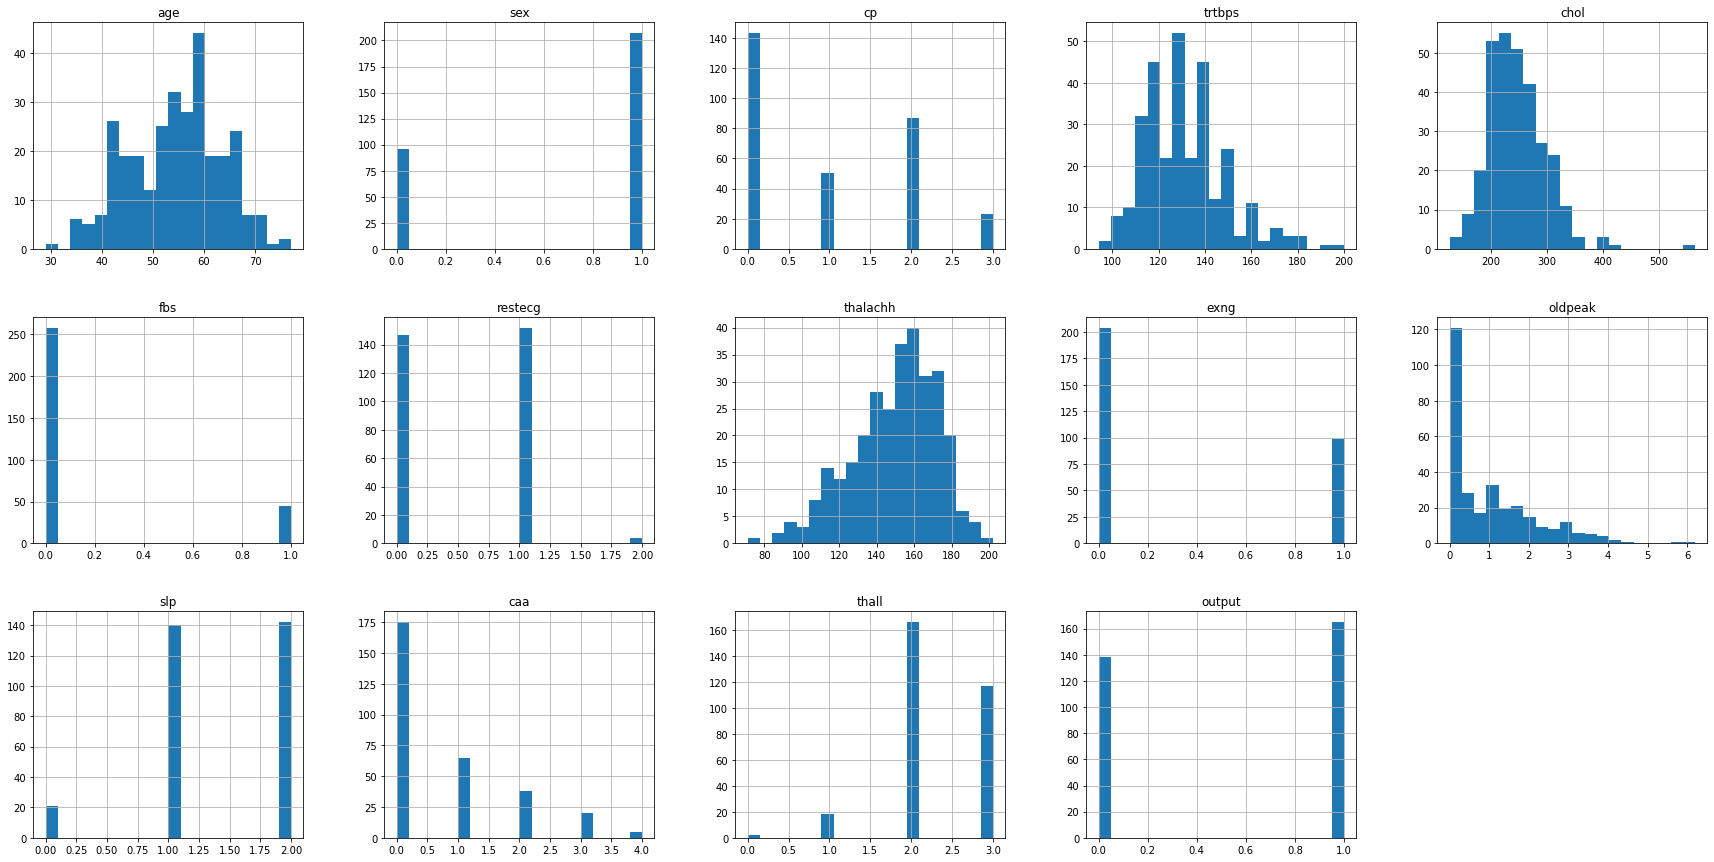

In [5]:
df.hist(figsize=(30,15), bins = 20, layout=(3,5))

Check for bad data:

In [6]:
# check for zeros
df[df == 0].count() 

age           0
sex          96
cp          143
trtbps        0
chol          0
fbs         258
restecg     147
thalachh      0
exng        204
oldpeak      99
slp          21
caa         175
thall         2
output      138
dtype: int64

In [7]:
# check for negatives
df[df<0].count()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
# Check for duplicated rows:
len(df[df.duplicated()])

1

In [9]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

Impute missing values:

In [10]:
# no missing data for this dataset

In [11]:
Y = df.loc[:, df.columns == 'output']
X = df.loc[:, df.columns != 'output']

Data distribution

In [12]:
# check skew of data
X.skew()

age        -0.203743
sex        -0.786120
cp          0.493022
trtbps      0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalachh   -0.532671
exng        0.737281
oldpeak     1.266173
slp        -0.503247
caa         1.295738
thall      -0.481232
dtype: float64

In [13]:
X.kurtosis()

age        -0.527512
sex        -1.391273
cp         -1.183729
trtbps      0.922996
chol        4.542591
fbs         1.937947
restecg    -1.359464
thalachh   -0.062186
exng       -1.466170
oldpeak     1.567876
slp        -0.629935
caa         0.781003
thall       0.295855
dtype: float64

Standardizing data

In [14]:
columns = X.columns
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = columns

Checking for outliers:

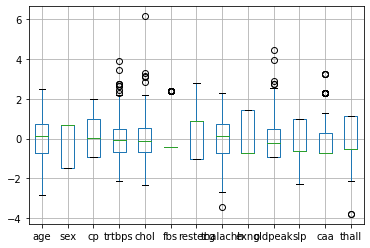

In [15]:
boxplot = X.boxplot() 

Winsorizing outliers

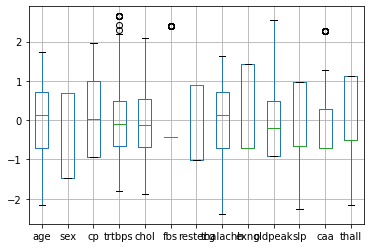

In [16]:
def winsorize_series(X):
    return winsorize(X, limits=[0.01,0.02])

X_win = X.apply(winsorize_series, axis=0)
boxplot = X_win.boxplot() 


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>,
        <AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>,
        <AxesSubplot:title={'center':'thall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

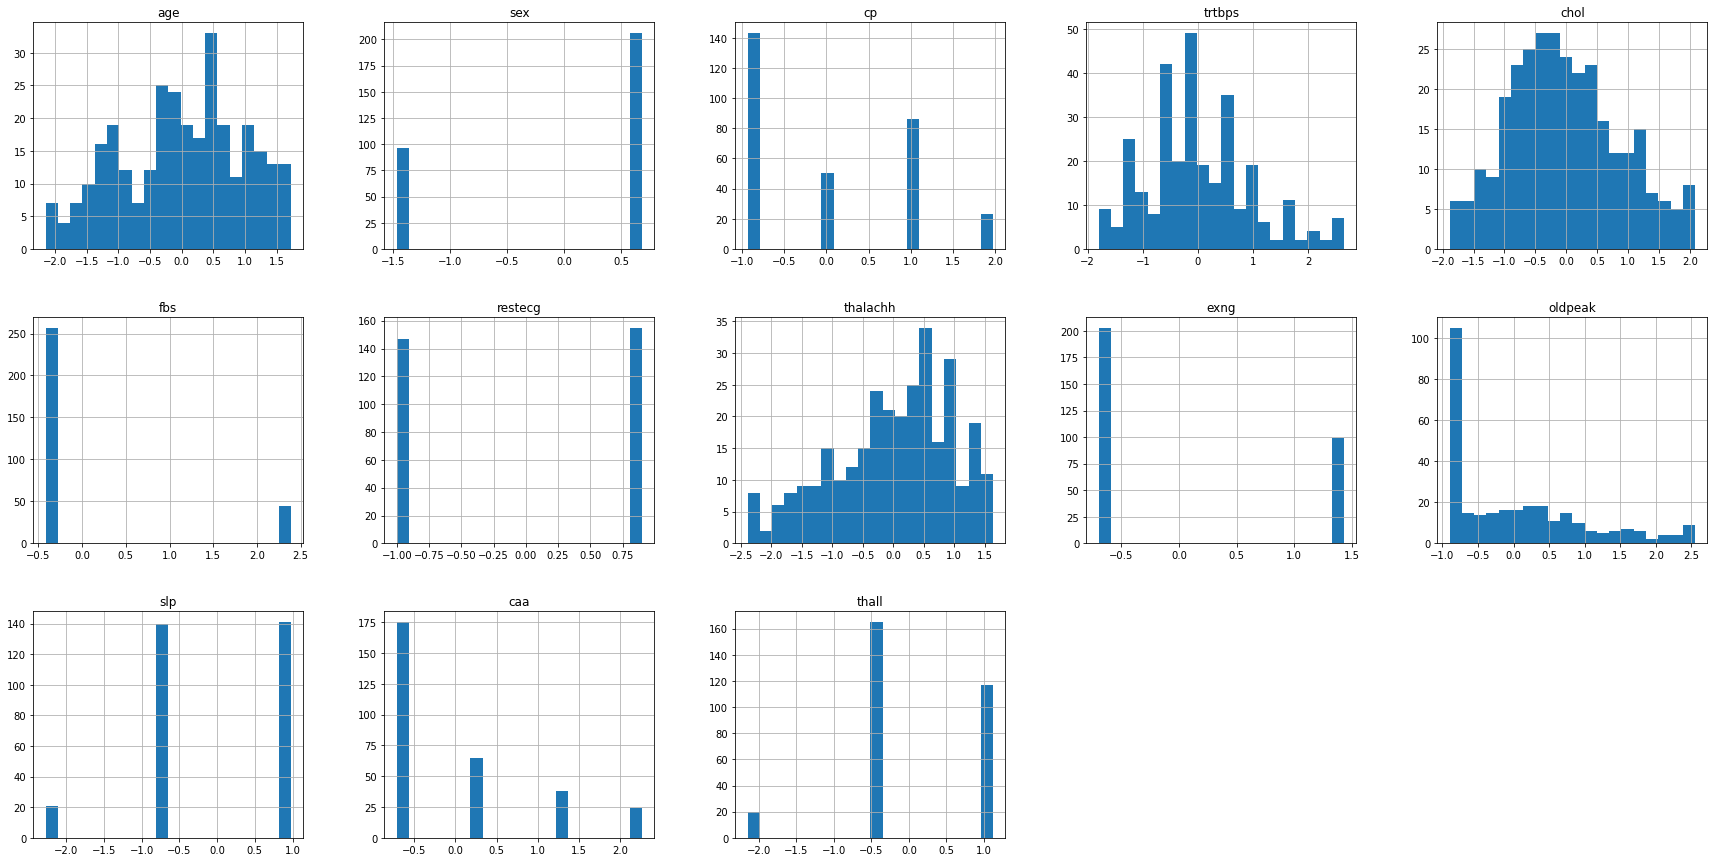

In [17]:
X_win.hist(figsize=(30,15), bins = 20, layout=(3,5))

Text(0.5, 1.0, 'Violin plot of features')

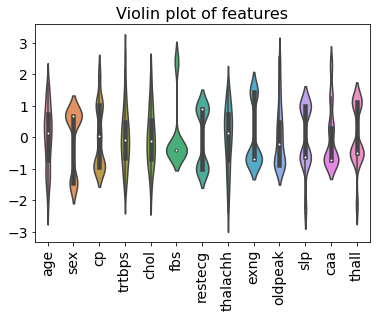

In [18]:
plt.rcParams['font.size'] = 14

f = sns.violinplot(data=X_win)

f.set_xticklabels(f.get_xticklabels(),
                  rotation=90)

plt.title("Violin plot of features",
          size=16)

Check for data imbalance

In [19]:
print(Y.value_counts())

output
1         164
0         138
dtype: int64


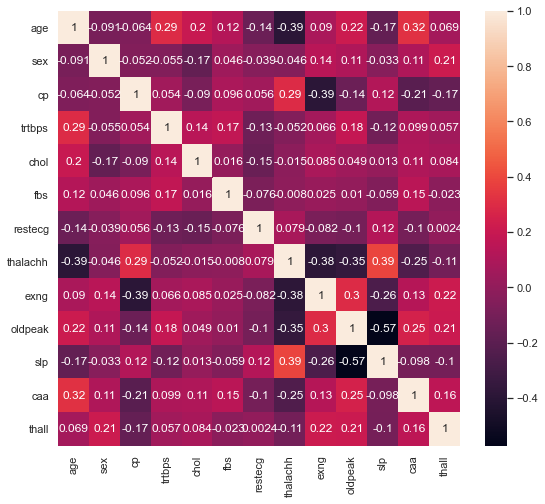

In [20]:
corr_matrix = X_win.corr()
sns.set (rc = {'figure.figsize':(9, 8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_win, Y, test_size=0.20, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression#, CatBoost, GaussianNB, RandomForestClassifier, MLPClassifier
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 0.8360655737704918
score on train: 0.8713692946058091


c:\Anaconda38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

c:\Anaconda38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score on test: 0.8360655737704918
score on train: 0.995850622406639


In [24]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


c:\Anaconda38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
